In [79]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv("alzheimer.csv")
df.head()

,Group,M/F,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,M,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Group   373 non-null    object 
 1   M/F     373 non-null    object 
 2   Age     373 non-null    int64  
 3   EDUC    373 non-null    int64  
 4   SES     354 non-null    float64
 5   MMSE    371 non-null    float64
 6   CDR     373 non-null    float64
 7   eTIV    373 non-null    int64  
 8   nWBV    373 non-null    float64
 9   ASF     373 non-null    float64
dtypes: float64(5), int64(3), object(2)
memory usage: 29.3+ KB


In [82]:
df.isnull().sum()

Group     0
M/F       0
Age       0
EDUC      0
SES      19
MMSE      2
CDR       0
eTIV      0
nWBV      0
ASF       0
dtype: int64

In [83]:
df.MMSE.fillna(df.MMSE.value_counts().index[0], inplace=True)
df.SES.fillna(df.SES.value_counts().index[0], inplace=True)

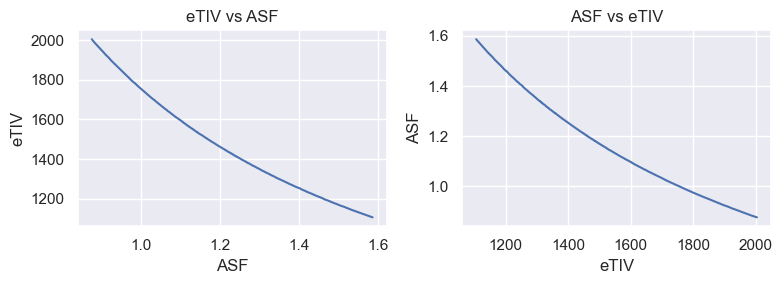

In [85]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].set_title('eTIV vs ASF')
ax[1].set_title('ASF vs eTIV')
sns.lineplot(x='ASF', y='eTIV', data=df, err_style=None, ax=ax[0])
sns.lineplot(y='ASF', x='eTIV', data=df, err_style=None, ax=ax[1])
plt.tight_layout()
plt.show()

Text(0.5, 0, 'CDR')

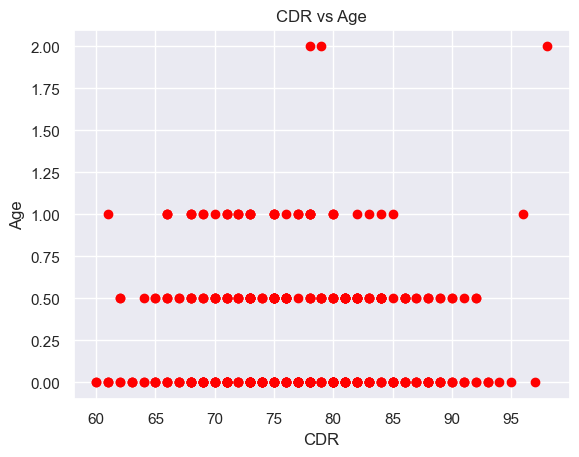

In [86]:
import matplotlib.pyplot as plt

plt.scatter(df['Age'], df['CDR'], color='red', marker='o')
plt.title('CDR vs Age')
plt.ylabel('Age')
plt.xlabel('CDR')



In [87]:
df['Group'] = df['Group'].map({'Nondemented': 0, 'Converted': 1, 'Demented': 2})

In [88]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['M/F'] = label_encoder.fit_transform(df['M/F'])

In [89]:
x = df.drop('Group', axis=1)
y = df['Group']

In [90]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

In [91]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [92]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [93]:
model = Sequential()

model.add(Dense(64, activation = "relu",input_shape=(x_train.shape[1],)))
model.add(Dense(32, activation = "relu"))
model.add(Dense(8 ,activation  = "relu"))

model.add(Dense(1))

model.compile(optimizer = "adam",loss ="mse", metrics=['mae'])

In [94]:
model.fit(x = x_train, y =y_train, epochs = 300,validation_data = (x_test,y_test),batch_size=32)

Epoch 1/300
8/8 [==============================] - 1s 27ms/step - loss: 1.7194 - mae: 0.9608 - val_loss: 1.3042 - val_mae: 0.8259
Epoch 2/300
8/8 [==============================] - 0s 8ms/step - loss: 1.2639 - mae: 0.8577 - val_loss: 0.9700 - val_mae: 0.7840
Epoch 3/300
8/8 [==============================] - 0s 9ms/step - loss: 0.9003 - mae: 0.7820 - val_loss: 0.6781 - val_mae: 0.7101
Epoch 4/300
8/8 [==============================] - 0s 10ms/step - loss: 0.6211 - mae: 0.6825 - val_loss: 0.5153 - val_mae: 0.6141
Epoch 5/300
8/8 [==============================] - 0s 9ms/step - loss: 0.4375 - mae: 0.5691 - val_loss: 0.4760 - val_mae: 0.5876
Epoch 6/300
8/8 [==============================] - 0s 8ms/step - loss: 0.3714 - mae: 0.5072 - val_loss: 0.4595 - val_mae: 0.5544
Epoch 7/300
8/8 [==============================] - 0s 9ms/step - loss: 0.3263 - mae: 0.4568 - val_loss: 0.4073 - val_mae: 0.5056
Epoch 8/300
8/8 [==============================] - 0s 10ms/step - loss: 0.2939 - mae: 0.4153 - 

8/8 [==============================] - 0s 8ms/step - loss: 0.0269 - mae: 0.1070 - val_loss: 0.1473 - val_mae: 0.2489
Epoch 65/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0274 - mae: 0.1082 - val_loss: 0.1436 - val_mae: 0.2468
Epoch 66/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0260 - mae: 0.1072 - val_loss: 0.1431 - val_mae: 0.2452
Epoch 67/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0257 - mae: 0.1049 - val_loss: 0.1495 - val_mae: 0.2499
Epoch 68/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0255 - mae: 0.1059 - val_loss: 0.1470 - val_mae: 0.2483
Epoch 69/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0247 - mae: 0.1016 - val_loss: 0.1431 - val_mae: 0.2427
Epoch 70/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0237 - mae: 0.0988 - val_loss: 0.1458 - val_mae: 0.2473
Epoch 71/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0232 - mae: 0.0982 - val_loss

Epoch 127/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0083 - mae: 0.0554 - val_loss: 0.1448 - val_mae: 0.2400
Epoch 128/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0079 - mae: 0.0533 - val_loss: 0.1454 - val_mae: 0.2412
Epoch 129/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0078 - mae: 0.0529 - val_loss: 0.1420 - val_mae: 0.2386
Epoch 130/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0076 - mae: 0.0532 - val_loss: 0.1447 - val_mae: 0.2405
Epoch 131/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0076 - mae: 0.0538 - val_loss: 0.1439 - val_mae: 0.2389
Epoch 132/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0077 - mae: 0.0541 - val_loss: 0.1460 - val_mae: 0.2437
Epoch 133/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0081 - mae: 0.0556 - val_loss: 0.1450 - val_mae: 0.2416
Epoch 134/300
8/8 [==============================] - 0s 9ms/step - loss: 0.0076 - m

8/8 [==============================] - 0s 8ms/step - loss: 0.0026 - mae: 0.0315 - val_loss: 0.1548 - val_mae: 0.2508
Epoch 190/300
8/8 [==============================] - 0s 7ms/step - loss: 0.0026 - mae: 0.0312 - val_loss: 0.1576 - val_mae: 0.2526
Epoch 191/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0305 - val_loss: 0.1547 - val_mae: 0.2505
Epoch 192/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0288 - val_loss: 0.1571 - val_mae: 0.2523
Epoch 193/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0024 - mae: 0.0293 - val_loss: 0.1550 - val_mae: 0.2505
Epoch 194/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0333 - val_loss: 0.1571 - val_mae: 0.2531
Epoch 195/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0027 - mae: 0.0323 - val_loss: 0.1585 - val_mae: 0.2542
Epoch 196/300
8/8 [==============================] - 0s 8ms/step - loss: 0.0025 - mae: 0.0296 - v

8/8 [==============================] - 0s 8ms/step - loss: 9.6166e-04 - mae: 0.0183 - val_loss: 0.1617 - val_mae: 0.2549
Epoch 252/300
8/8 [==============================] - 0s 6ms/step - loss: 9.1559e-04 - mae: 0.0190 - val_loss: 0.1606 - val_mae: 0.2537
Epoch 253/300
8/8 [==============================] - 0s 7ms/step - loss: 8.7876e-04 - mae: 0.0167 - val_loss: 0.1617 - val_mae: 0.2550
Epoch 254/300
8/8 [==============================] - 0s 7ms/step - loss: 9.2629e-04 - mae: 0.0181 - val_loss: 0.1598 - val_mae: 0.2526
Epoch 255/300
8/8 [==============================] - 0s 7ms/step - loss: 8.8946e-04 - mae: 0.0189 - val_loss: 0.1633 - val_mae: 0.2567
Epoch 256/300
8/8 [==============================] - 0s 6ms/step - loss: 9.7440e-04 - mae: 0.0198 - val_loss: 0.1589 - val_mae: 0.2516
Epoch 257/300
8/8 [==============================] - 0s 7ms/step - loss: 9.8810e-04 - mae: 0.0193 - val_loss: 0.1617 - val_mae: 0.2543
Epoch 258/300
8/8 [==============================] - 0s 9ms/step - lo

In [95]:
loss, mae = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}, Test MAE: {mae}')


4/4 [==============================] - 0s 4ms/step - loss: 0.1620 - mae: 0.2511
Test loss: 0.1619759202003479, Test MAE: 0.251083105802536


<Axes: >

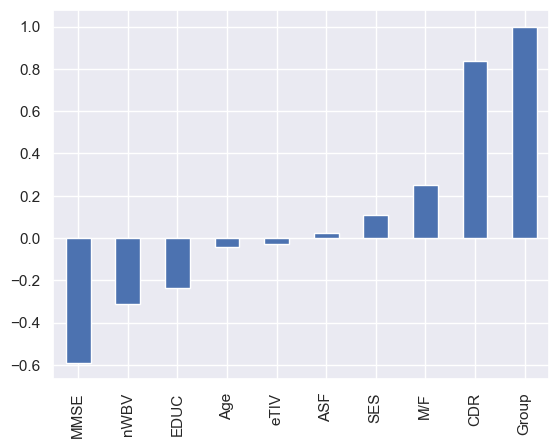

In [96]:
df.corr()['Group'].sort_values().plot(kind="bar")

Text(0, 0.5, 'Sayı')

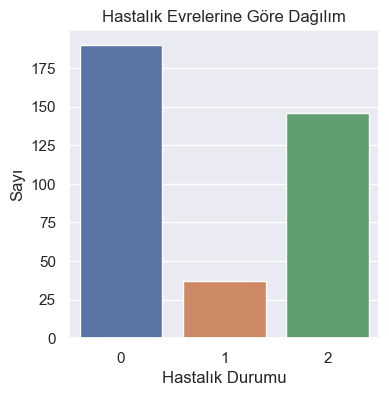

In [97]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='Group')
plt.title('Hastalık Evrelerine Göre Dağılım')
plt.xlabel('Hastalık Durumu')
plt.ylabel('Sayı')

Text(0.5, 1.0, 'Cinsiyet Dağılımı')

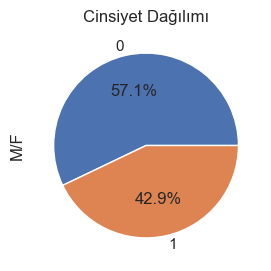

In [98]:
plt.figure(figsize=(3,3))
df['M/F'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Cinsiyet Dağılımı')

<Axes: xlabel='SES', ylabel='count'>

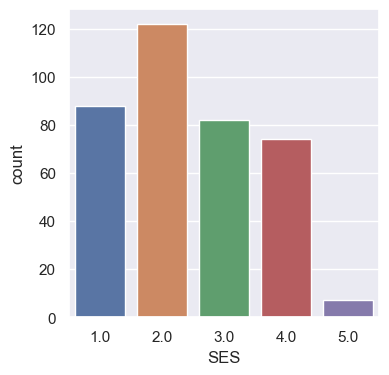

In [99]:
import seaborn as sns
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='SES')

<Axes: xlabel='MMSE', ylabel='count'>

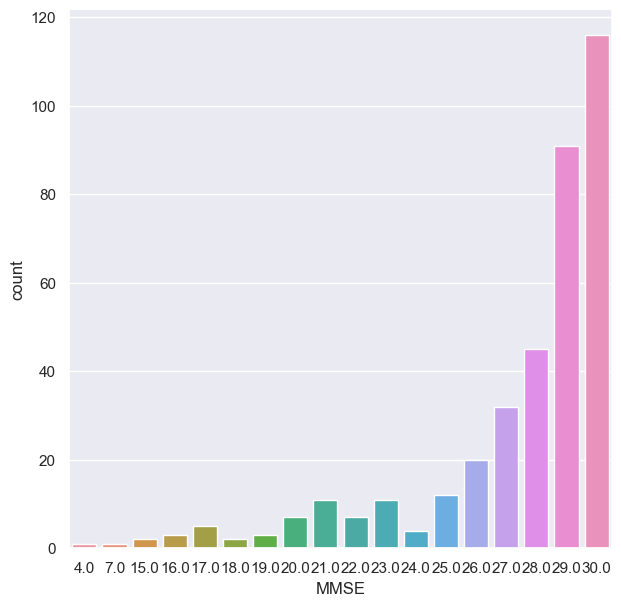

In [100]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.countplot(data=df, x='MMSE')

<Axes: xlabel='MMSE', ylabel='Density'>

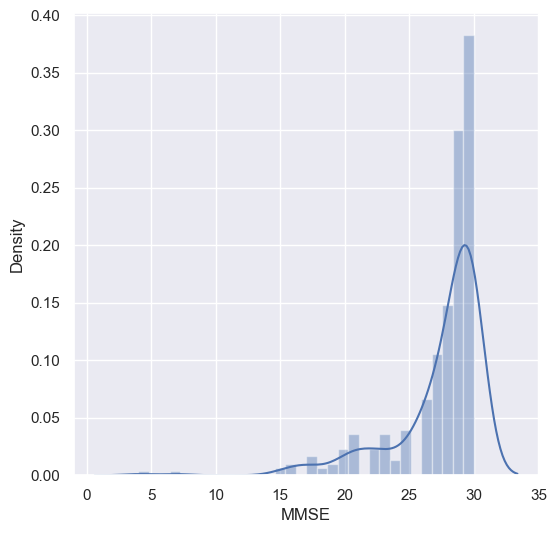

In [101]:
plt.figure(figsize=(6,6))
sns.distplot(df["MMSE"])

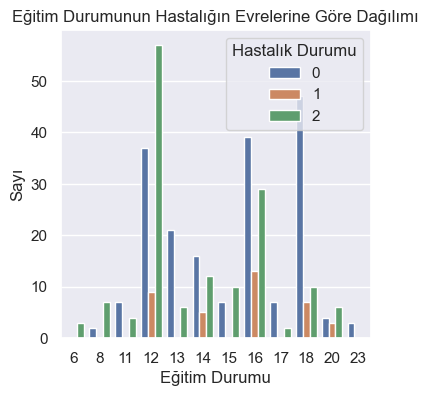

In [103]:
plt.figure(figsize=(4,4))
sns.countplot(data=df, x='EDUC', hue='Group')
plt.title('Eğitim Durumunun Hastalığın Evrelerine Göre Dağılımı')
plt.xlabel('Eğitim Durumu')
plt.ylabel('Sayı')
plt.legend(title='Hastalık Durumu')

Text(0, 0.5, 'Frekans')

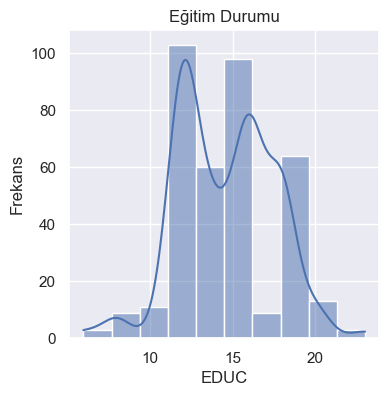

In [104]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='EDUC', bins=10, kde=True)
plt.title('Eğitim Durumu')
plt.xlabel('EDUC')
plt.ylabel('Frekans')

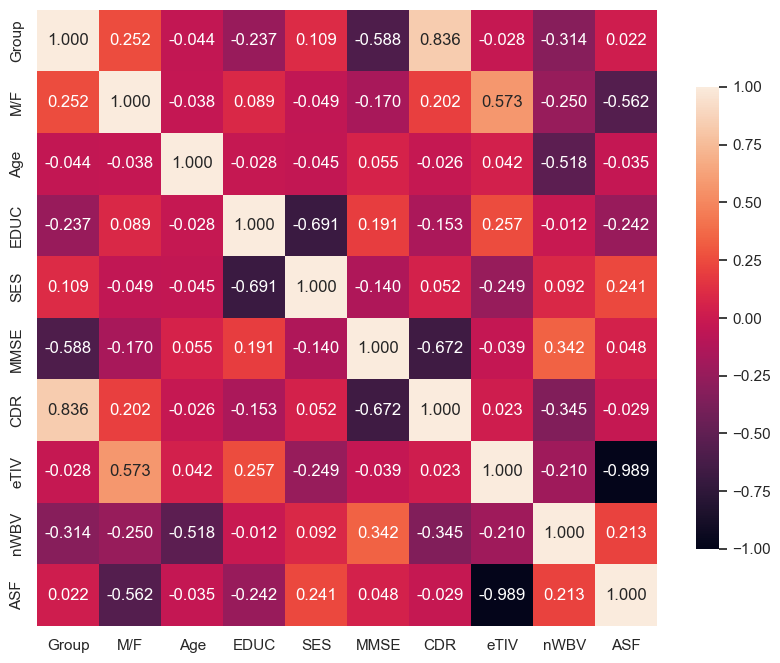

In [108]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cbar_kws={'shrink': .75}, fmt='.3f')
plt.show()

Text(0.5, 1.0, 'CDR Dağılımı')

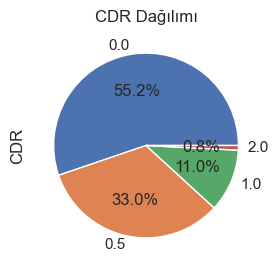

In [109]:
plt.figure(figsize=(3,3))
df['CDR'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('CDR Dağılımı')

Text(0.5, 1.0, 'SES Dağılımı')

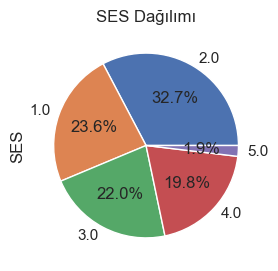

In [114]:
plt.figure(figsize=(3,3))
df['SES'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('SES Dağılımı')

Text(0, 0.5, 'Frekans')

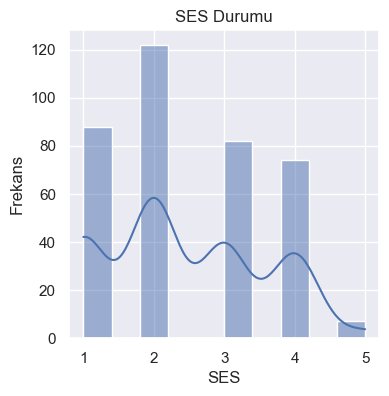

In [116]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='SES', bins=10, kde=True)
plt.title('SES Durumu')
plt.xlabel('SES')
plt.ylabel('Frekans')

Text(0, 0.5, 'Frekans')

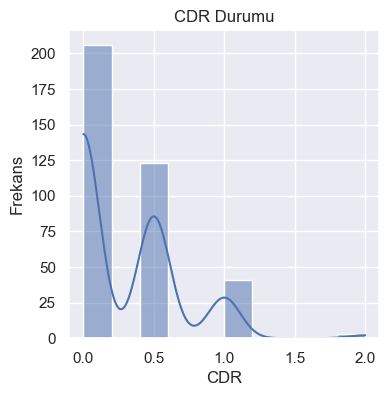

In [118]:
plt.figure(figsize=(4,4))
sns.histplot(data=df, x='CDR', bins=10, kde=True)
plt.title('CDR Durumu')
plt.xlabel('CDR')
plt.ylabel('Frekans')